Import Libraries 

In [31]:
import pandas as pd
import numpy as np
import matplotlib as mt
import seaborn as sns
import seaborn as sns
sns.set_style('whitegrid')
sns.set()
import scipy 
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import pickle
import pprint
import json

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Import Data

In [2]:
BOA = pd.read_csv("Bank of America.csv")
C = pd.read_csv("City Group.csv")
GS = pd.read_csv("Goldman Sachs.csv")
JPM = pd.read_csv("JP Morgan.csv")
MS = pd.read_csv("Morgan Stanley.csv")
WFC = pd.read_csv("Wells Fargo.csv")
bank_stocks = pd.read_pickle("all_banks")
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']


Exploring Data

In [13]:
# first 10 records 
bank_stocks.head(10)

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   
2006-01-10   46.40  46.51  45.88  46.21  15634800  483.0  485.5  480.8  485.4   
2006-01-11   46.06  46.25  45.75  46.10  14745100  495.8  495.8  485.8  489.8   
2006-01-12   46.22  46.23  45.71  45.80  10546600  491.0  491.0  488.8  490.3   
2006-01-13   45.83  46.00  45.68  45.80  10791300  491.0  491.9  487.3  489.2   
2006-01-17   45.40  45.58  45.00  45.31  14606100  485.1  487.0  482.7  484.3   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   
2006-01-10   1365960  ...  58.85  59.22  58.58  59.22  4713600  31.55  31.68   
2006-01-11   1684440  ...  59.15  59.88  58.84  59.57  5837900  31.65  31.90   
2006-01-12   1230060  ...  59.63  59.78  59.27  59.47  3817700  31.70  31.79   
2006-01-13    940930  ...  59.57  59.67  59.06  59.38  3430900  31.55  31.80   
2006-01-17   1237830  ...  59.45  59.46  58.68  58.81  2624700  31.46  31.58   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  
2006-01-10   31.44  31.65   7157800  
2006-01-11   31.58  31.82   8049600  
2006-01-12   31.43  31.44  10763600  
2006-01-13   31.51  31.62   6366000  
2006-01-17   31.20  31.30  10690600  

[10 rows x 30 columns]

In [4]:
# Descriptive statestics 
bank_stocks.describe()

Bank Ticker          BAC                                                       \
Stock Info          Open         High          Low        Close        Volume   
count        2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean           22.205217    22.479182    21.894076    22.174617  1.333590e+08   
std            15.308041    15.406193    15.197964    15.304852  1.274974e+08   
min             3.220000     3.510000     2.530000     3.140000  4.836000e+06   
25%            12.310000    12.450000    12.130000    12.270000  4.845598e+07   
50%            15.780000    15.970000    15.600000    15.790000  1.015867e+08   
75%            32.730000    33.600000    31.750000    32.630000  1.752694e+08   
max            55.040000    55.080000    54.820000    54.900000  1.226791e+09   

Bank Ticker            C                                                       \
Stock Info          Open         High          Low        Close        Volume   
count        2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean          145.661124   147.401685   143.602412   145.372658  2.859715e+07   
std           177.547336   178.987879   175.987635   177.409683  2.982102e+07   
min             4.550000     0.000000     4.500000     4.520000  6.328600e+05   
25%            39.500000    40.090000    38.780000    39.380000  1.008514e+07   
50%            49.430000    49.920000    48.890000    49.390000  2.183961e+07   
75%           197.400000   204.600000   190.400000   196.900000  3.878944e+07   
max           566.000000   570.000000   555.500000   564.100000  5.131787e+08   

Bank Ticker  ...           MS                                         \
Stock Info   ...         Open         High          Low        Close   
count        ...  2517.000000  2517.000000  2517.000000  2517.000000   
mean         ...    36.022133    36.559186    35.443925    36.006198   
std          ...    18.666122    18.815168    18.516753    18.669476   
min          ...     9.190000    10.210000     6.710000     9.200000   
25%          ...    23.800000    24.460000    23.270000    23.870000   
50%          ...    30.400000    30.790000    29.960000    30.340000   
75%          ...    40.110000    41.050000    39.590000    40.210000   
max          ...    90.770000    90.950000    88.330000    89.300000   

Bank Ticker                        WFC                                         \
Stock Info         Volume         Open         High          Low        Close   
count        2.517000e+03  2517.000000  2517.000000  2517.000000  2517.000000   
mean         1.764023e+07    35.600727    36.015542    35.169110    35.598411   
std          1.690477e+07    10.010587     9.928720    10.105723    10.012581   
min          1.120500e+06     8.650000     8.940000     7.800000     8.120000   
25%          8.676259e+06    28.410000    28.990000    27.950000    28.490000   
50%          1.391242e+07    33.410000    33.890000    33.020000    33.500000   
75%          2.164847e+07    41.060000    41.420000    40.790000    41.220000   
max          3.297860e+08    58.730000    58.760000    58.070000    58.520000   

Bank Ticker                
Stock Info         Volume  
count        2.517000e+03  
mean         3.293280e+07  
std          3.572992e+07  
min          2.392000e+06  
25%          1.381537e+07  
50%          2.317952e+07  
75%          3.796472e+07  
max          4.787366e+08  

[8 rows x 30 columns]

In [5]:
#correlation (volume)
bank_stocks.xs('Volume',axis=1,level=1).corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.568429,0.390288,0.683089,0.512913,0.695822
C,0.568429,1.000000,0.222898,0.436769,0.309674,0.366510
GS,0.390288,0.222898,1.000000,0.708293,0.705013,0.629652
JPM,0.683089,0.436769,0.708293,1.000000,0.677254,0.821589
MS,0.512913,0.309674,0.705013,0.677254,1.000000,0.596983
WFC,0.695822,0.366510,0.629652,0.821589,0.596983,1.000000


(6.0, 0)

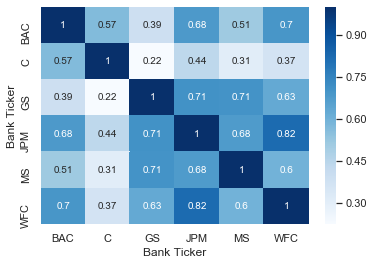

In [6]:
#Correlation heat map (Volume)
x_axis_labels = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
sns.heatmap(bank_stocks.xs('Volume',axis=1,level=1).corr(),annot=True,cmap='Blues',xticklabels=x_axis_labels)
plt.ylim(6.0, 0)

In [7]:
#correlation (Closing Price)
bank_stocks.xs('Close',axis=1,level=1).corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971514,0.550950,0.103896,0.944219,0.008567
C,0.971514,1.000000,0.434171,0.003540,0.933605,-0.068441
GS,0.550950,0.434171,1.000000,0.685280,0.683834,0.499901
JPM,0.103896,0.003540,0.685280,1.000000,0.250441,0.940279
MS,0.944219,0.933605,0.683834,0.250441,1.000000,0.131864
WFC,0.008567,-0.068441,0.499901,0.940279,0.131864,1.000000


(6.0, 0)

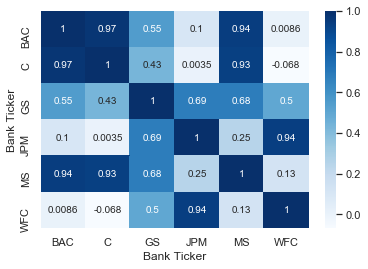

In [8]:
#Correlation heat map (Closing price)
x_axis_labels = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
sns.heatmap(bank_stocks.xs('Close',axis=1,level=1).corr(),annot=True,cmap='Blues',xticklabels=x_axis_labels)
plt.ylim(6.0, 0)


In [9]:
#correlation (opening price)
bank_stocks.xs('Open',axis=1,level=1).corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971560,0.549780,0.103113,0.944236,0.008495
C,0.971560,1.000000,0.432318,0.002469,0.933526,-0.068664
GS,0.549780,0.432318,1.000000,0.686328,0.682414,0.500136
JPM,0.103113,0.002469,0.686328,1.000000,0.250661,0.940094
MS,0.944236,0.933526,0.682414,0.250661,1.000000,0.132411
WFC,0.008495,-0.068664,0.500136,0.940094,0.132411,1.000000


(6.0, 0)

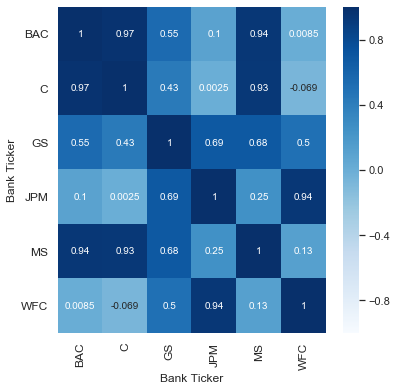

In [10]:
#Correlation heat map (opening price)
plt.figure(figsize = (6.0,6.0))
s =sns.heatmap(bank_stocks.xs('Open',axis=1,level=1).corr(), 
            vmin = -1,                       
            vmax = 1,                      
            cmap = 'Blues',                      
            annot = True)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.ylim(6.0, 0)

Hierarchical Clusturing 

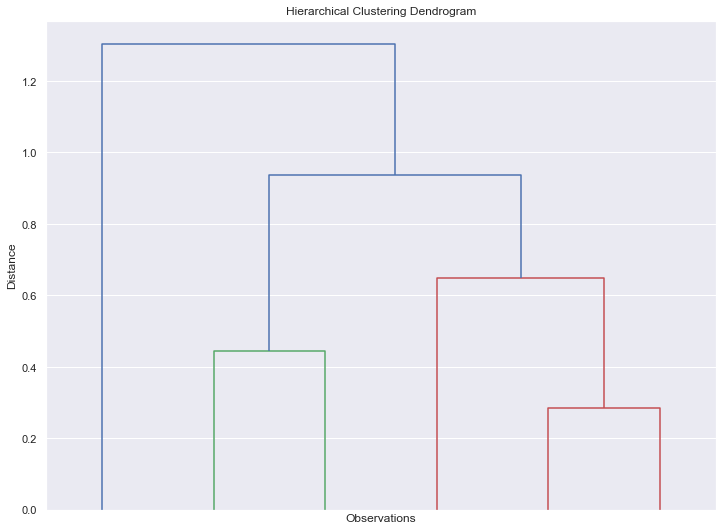

In [11]:

hier_clust = linkage(bank_stocks.xs('Volume',axis=1,level=1).corr(), method = 'ward')

plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

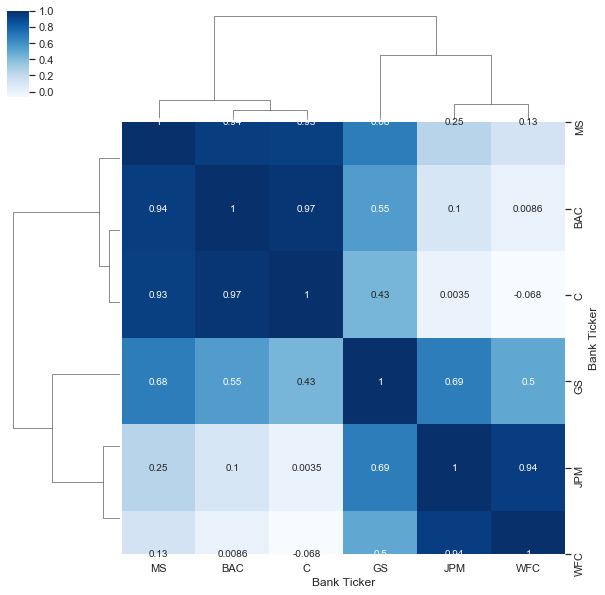

In [12]:
# Clustur map (Closing map)
sns.clustermap(bank_stocks.xs('Close',axis=1,level=1).corr(),annot=True,cmap='Blues')

In [15]:
# Max closing stock price for each bank 
bank_stocks.xs('Close', level=1, axis=1).max()



Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

Returns on stocks of each bank 

In [17]:
returns = pd.DataFrame()

for x in tickers:
    returns[x + ' Return'] = bank_stocks.xs('Close',axis=1,level=1)[x].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


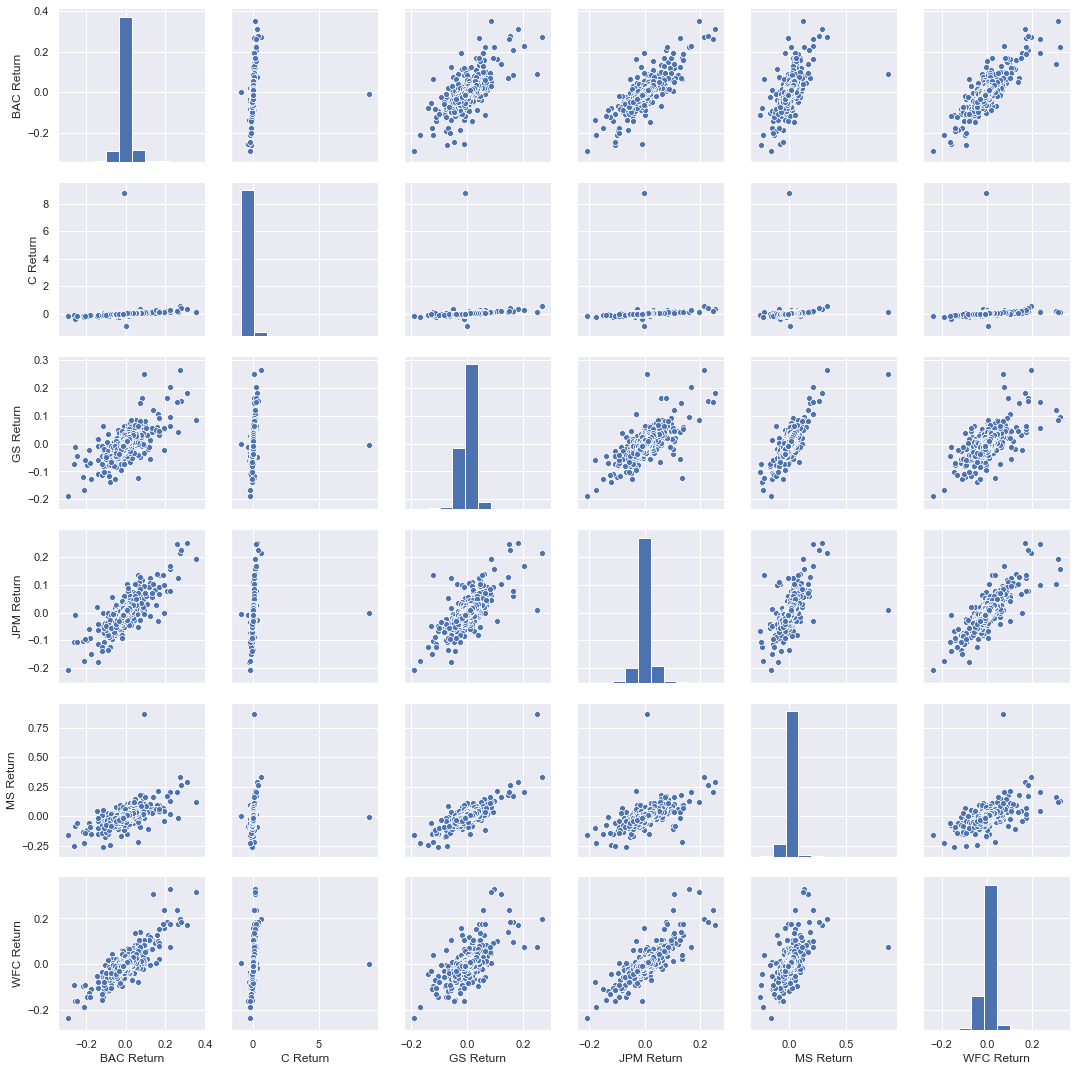

In [20]:
sns.pairplot(returns[1:])

Returns : Best Day 

In [22]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Returns : Worst Day 

In [24]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

Risk Analysis

In [26]:
# over all risk 
returns.std() 

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [28]:
# Risk analysis post finacial crisis 
returns.loc['2015-01-01':'2015-12-31'].std()



BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Stock closing price analysis 

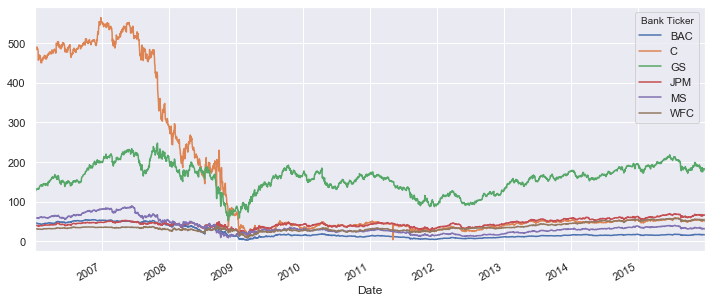

In [33]:
bank_stocks.xs('Close',axis=1,level=1).plot(figsize=(12,5))

Moving avarage 

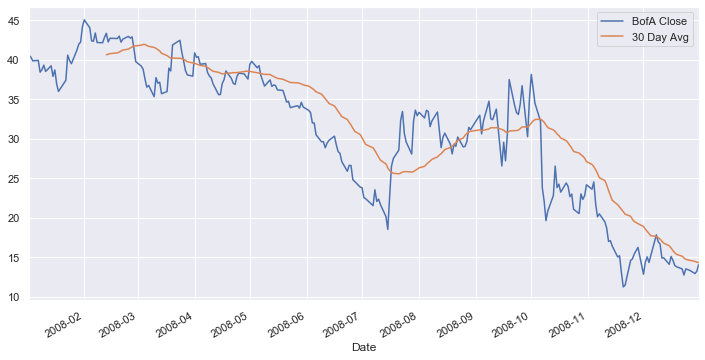

In [34]:
bank_stocks.loc['2008-01-01':'2008-12-31'].xs('Close',axis=1,level=1)['BAC'].plot(figsize=(12,6),label='BofA Close')
rolling_avg = pd.DataFrame()
rolling_avg['30 Day Avg'] = bank_stocks.loc['2008-01-01':'2008-12-31'].xs('Close',axis=1,level=1)['BAC'].rolling(window=30).mean()
rolling_avg['30 Day Avg'].plot(figsize=(12,6),label='30 Day Avg')
plt.legend()